In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [2]:
with open('twitter_combined.txt') as f:
    mylist = [tuple(map(int, i.split(' '))) for i in f]

In [3]:
T = nx.Graph()
subList = [(a, b) for a, b in mylist if a < 1000 and b < 1000]
T.add_edges_from(subList)
print("Number of nodes = " + str(len(T.nodes())))
print("Number of edges = " + str(len(T.edges())))

Number of nodes = 34
Number of edges = 90


In [4]:
from itertools import combinations

# Define is_in_triangle() 
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph `G` is in a triangle relationship or not. 
    
    Returns a boolean.
    """
    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [5]:
is_in_triangle(T, 20)

True

In [6]:
# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):
    """
    Returns the nodes in a graph `G` that are involved in a triangle relationship with the node `n`.
    """
    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
len(nodes_in_triangle(T, 20))

16

In [7]:
# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(T, n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)

20


C:\Users\mattc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


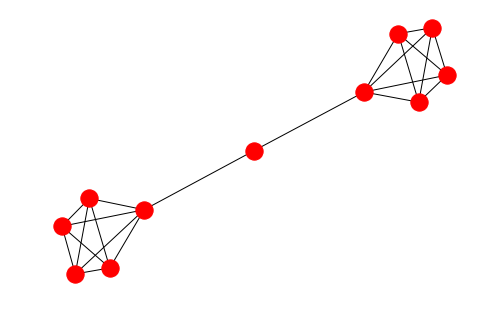

In [8]:
G = nx.barbell_graph(m1=5, m2=1)
nx.draw(G)
plt.show()

In [9]:
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

In [10]:
# Define maximal_cliques()
def maximal_cliques(G, size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs

# Check that there are 2 maximal cliques of size 5 in the graph G
assert len(maximal_cliques(G, 5)) == 2

In [11]:
maximal_cliques(T, 5)

[[12, 586, 13, 785, 291],
 [12, 586, 13, 785, 422],
 [20, 586, 13, 785, 291],
 [20, 586, 13, 785, 422]]

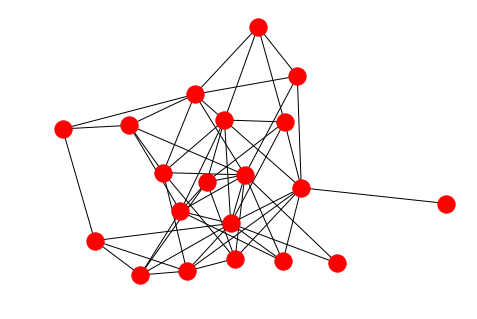

Number of nodes = 20
Number of edges = 54


[0, 7, 12, 19, 8]

In [12]:
G = nx.erdos_renyi_graph(n=20, p=0.25)
nx.draw(G)
plt.show()
print("Number of nodes = " + str(len(G.nodes())))
print("Number of edges = " + str(len(G.edges())))
nodes = list(G.neighbors(8))
nodes.append(8)
nodes

In [13]:
G_eight = G.subgraph(nodes)
G_eight.edges()

EdgeView([(0, 7), (0, 8), (0, 12), (0, 19), (7, 8), (8, 12), (8, 19)])

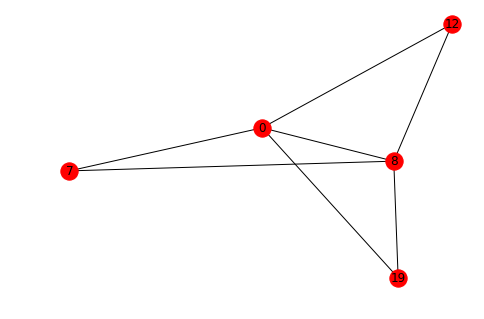

In [14]:
nx.draw(G_eight, with_labels=True)

In [15]:
s = set()
s.add(random.choice(list(T.nodes())))
s.add(random.choice(list(T.nodes())))
s.add(random.choice(list(T.nodes())))
nodes_of_interest = list(s)
nodes_of_interest

[418, 20, 949]

In [16]:
nodes_to_draw = nodes_of_interest
for n in nodes_of_interest:
    print("Node " + str(n) + ": neighbours = " + str(list(T.neighbors(n))))

Node 418: neighbours = [922, 573, 989, 648, 246, 295, 885, 20, 422, 586, 13, 12, 291]
Node 20: neighbours = [989, 66, 107, 13, 295, 648, 291, 885, 246, 422, 418, 586, 785, 767, 997, 414, 746, 949]
Node 949: neighbours = [20]


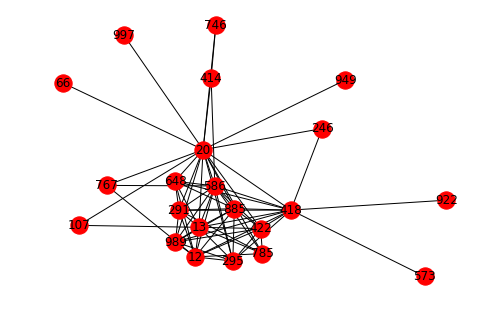

In [17]:
# Define get_nodes_and_nbrs()
def get_nodes_and_nbrs(G, nodes_of_interest):
    """
    Returns a subgraph of the graph `G` with only the `nodes_of_interest` and their neighbors.
    """
    nodes_to_draw = []
    
    # Iterate over the nodes of interest
    for n in nodes_of_interest:
    
        # Append the nodes of interest to nodes_to_draw
        nodes_to_draw.append(n)
        
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):
        
            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
            
    return G.subgraph(nodes_to_draw)

# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw, with_labels=True)
plt.show()

In [18]:
# Add random occupation to nodes
import random
jobs = ['doctor', 'nurse', 'teacher', 'tinker', 'tailor', 'soldier', 'spy', 'celebrity']
for n in T.nodes():
    T.node[n]['occupation'] = random.choice(jobs)

# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] ==  'celebrity']
noi

[586, 418, 422, 291]

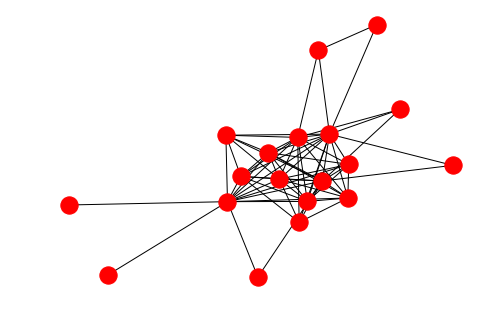

In [19]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in T.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = T.neighbors(n)
    
    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = T.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()